# PROJECT 1: NASA Turbofan Jet Engine Data Set

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We will start importing the datasets:

In [110]:
train_FD001=pd.read_csv('datasets/train_FD001.txt', sep=' ', header=None);
train_FD001.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20631 non-null  int64  
 1   1       20631 non-null  int64  
 2   2       20631 non-null  float64
 3   3       20631 non-null  float64
 4   4       20631 non-null  float64
 5   5       20631 non-null  float64
 6   6       20631 non-null  float64
 7   7       20631 non-null  float64
 8   8       20631 non-null  float64
 9   9       20631 non-null  float64
 10  10      20631 non-null  float64
 11  11      20631 non-null  float64
 12  12      20631 non-null  float64
 13  13      20631 non-null  float64
 14  14      20631 non-null  float64
 15  15      20631 non-null  float64
 16  16      20631 non-null  float64
 17  17      20631 non-null  float64
 18  18      20631 non-null  float64
 19  19      20631 non-null  float64
 20  20      20631 non-null  float64
 21  21      20631 non-null  int64  
 22

In [111]:
try:
    train_FD001=train_FD001.drop(columns=[26,27])
except:
    None

In [112]:
columns_name=['unit_number','time_in_cycles',
              'setting_1','setting_2','setting_3',] + \
              [f's_{i}' for i in range(1,22)]

train_FD001.columns=columns_name
train_FD001

,unit_number,time_in_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [113]:
train_FD001.std()

unit_number       2.922763e+01
time_in_cycles    6.888099e+01
setting_1         2.187313e-03
setting_2         2.930621e-04
setting_3         0.000000e+00
s_1               0.000000e+00
s_2               5.000533e-01
s_3               6.131150e+00
s_4               9.000605e+00
s_5               1.776400e-15
s_6               1.388985e-03
s_7               8.850923e-01
s_8               7.098548e-02
s_9               2.208288e+01
s_10              0.000000e+00
s_11              2.670874e-01
s_12              7.375534e-01
s_13              7.191892e-02
s_14              1.907618e+01
s_15              3.750504e-02
s_16              1.387812e-17
s_17              1.548763e+00
s_18              0.000000e+00
s_19              0.000000e+00
s_20              1.807464e-01
s_21              1.082509e-01
dtype: float64

In [114]:
train_FD001=train_FD001.drop(columns=['setting_3', 's_1', 's_5', 's_10', 's_16', 's_18', 's_19'])

Let's create the RUL column for the dataset:

In [115]:
RUL_test_FD001=pd.DataFrame(train_FD001.unit_number.value_counts().sort_index())
RUL_test_FD001

,count
unit_number,
1,192
2,287
3,179
4,189
5,269
...,...
96,336
97,202
98,156


In [116]:
RUL_test_FD001_2=[]

for i in range(1,len(RUL_test_FD001)+1):
    for j in range(0,RUL_test_FD001['count'][i]):
        RUL_test_FD001_2.append(RUL_test_FD001['count'][i]-j-1)

RUL_test_FD001_2=pd.DataFrame(RUL_test_FD001_2)
RUL_test_FD001_2.columns=['RUL']

RUL_test_FD001_2

,RUL
0,191
1,190
2,189
3,188
4,187
...,...
20626,4
20627,3
20628,2
20629,1


In [117]:
try:
    bl_FD001=train_FD001.drop(columns=['time_in_cycles'])
except:
    None

bl_FD001['RUL']=RUL_test_FD001_2['RUL']

bl_FD001

,unit_number,setting_1,setting_2,s_2,s_3,s_4,s_6,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21,RUL
0,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,-0.0004,-0.0003,643.49,1597.98,1428.63,21.61,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4
20627,100,-0.0016,-0.0005,643.54,1604.50,1433.58,21.61,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3
20628,100,0.0004,0.0000,643.42,1602.46,1428.18,21.61,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2
20629,100,-0.0011,0.0003,643.23,1605.26,1426.53,21.61,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1


<Axes: >

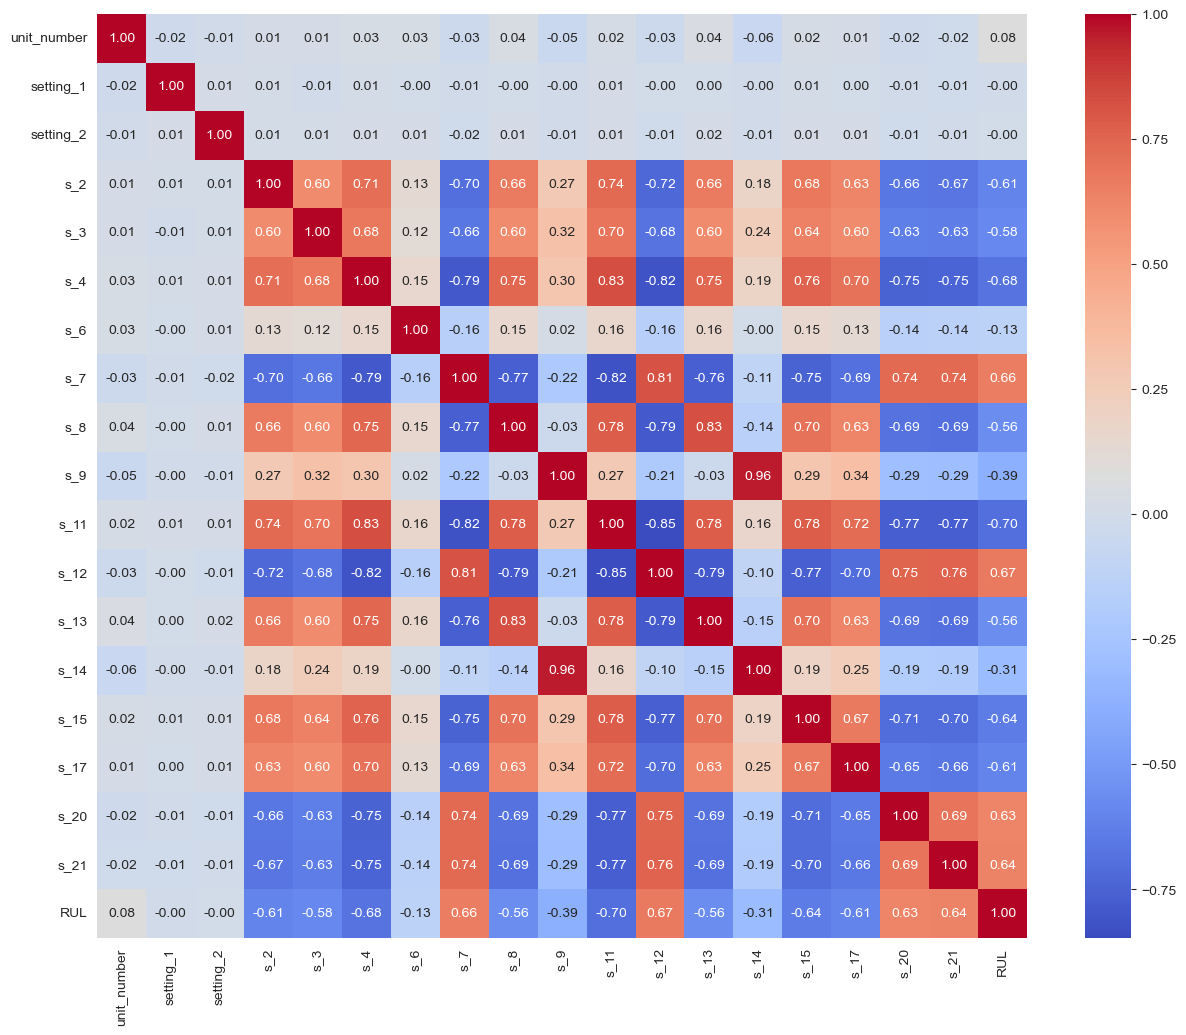

In [118]:
plt.tight_layout

correlation_matrix=bl_FD001.corr()

plt.figure(figsize=(15,12))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

<Figure size 640x480 with 0 Axes>

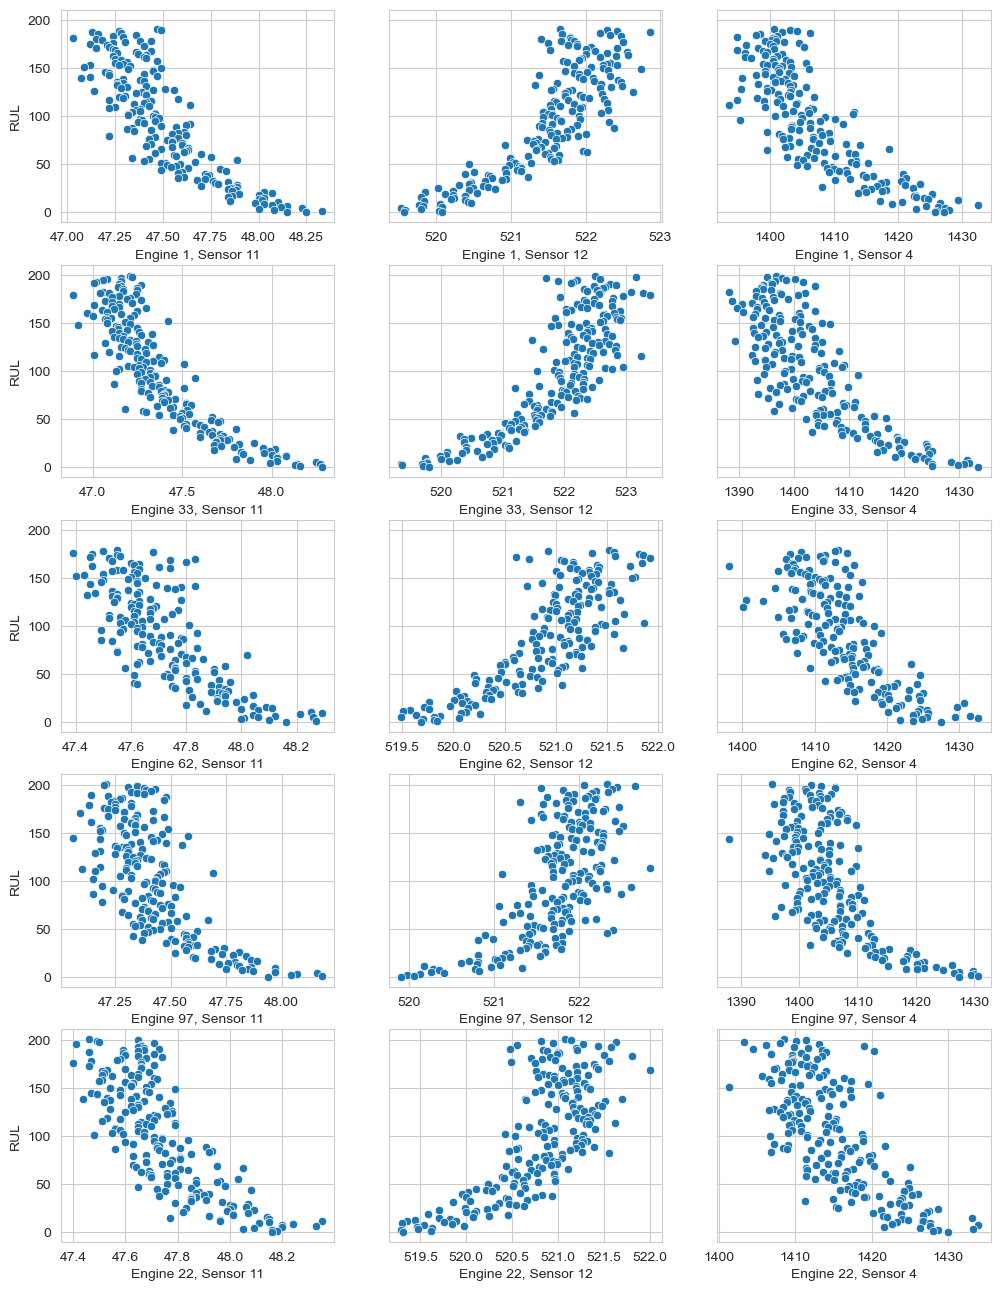

In [119]:
plt.tight_layout();
fig, axes = plt.subplots(5,3, figsize=(12,16), sharey=True);

sns.scatterplot(data=bl_FD001[bl_FD001['unit_number']==1], x='s_11', y='RUL', ax=axes[0,0])
axes[0,0].set_xlabel('Engine 1, Sensor 11');
axes[0,0].set_ylabel('RUL')

sns.scatterplot(data=bl_FD001[bl_FD001['unit_number']==1], x='s_12',y='RUL', ax=axes[0,1])
axes[0,1].set_xlabel('Engine 1, Sensor 12');

sns.scatterplot(data=bl_FD001[bl_FD001['unit_number']==1], x='s_4',y='RUL', ax=axes[0,2])
axes[0,2].set_xlabel('Engine 1, Sensor 4');

n=1
for ne in [33, 62, 97, 22]:
        sns.scatterplot(data=bl_FD001[bl_FD001['unit_number']==ne], x='s_11', y='RUL', ax=axes[n,0])
        axes[n,0].set_xlabel(f'Engine {ne}, Sensor 11');
        axes[n,0].set_ylabel(f'RUL')

        sns.scatterplot(data=bl_FD001[bl_FD001['unit_number']==ne], x='s_12',y='RUL', ax=axes[n,1])
        axes[n,1].set_xlabel(f'Engine {ne}, Sensor 12');

        sns.scatterplot(data=bl_FD001[bl_FD001['unit_number']==ne], x='s_4',y='RUL', ax=axes[n,2])
        axes[n,2].set_xlabel(f'Engine {ne}, Sensor 4');
        n=n+1


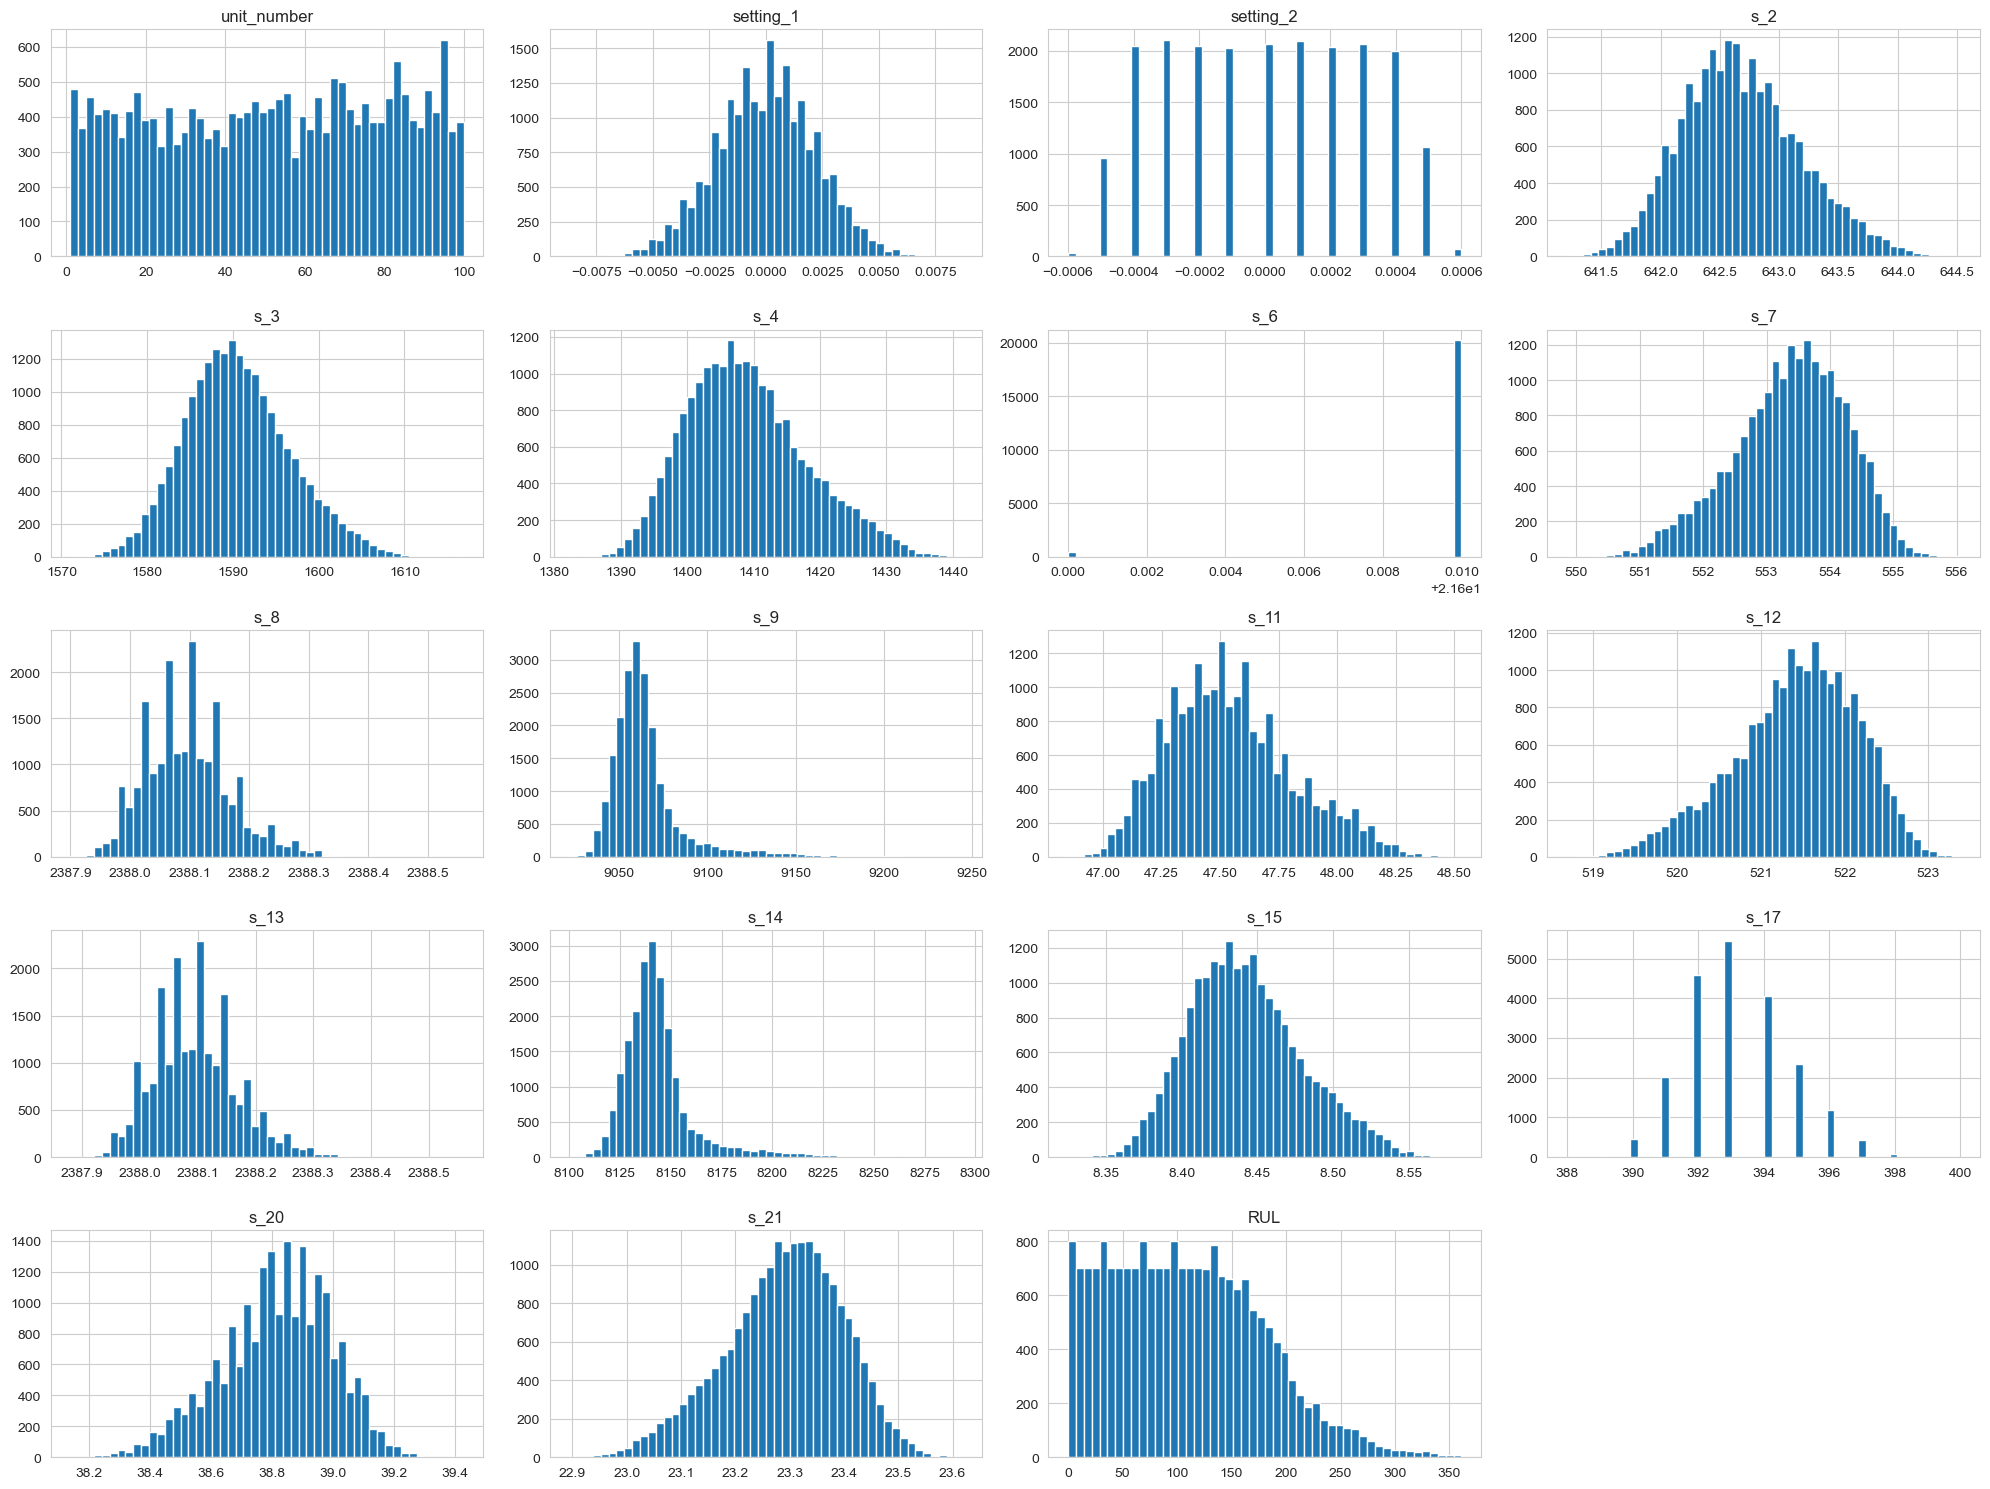

In [ ]:
bl_FD001.hist(bins=50, figsize=(20, 15))
plt.tight_layout()
plt.show()

Since, in the first plance, we are going to train the model with linear methods, we must avoid colinearity and should eliminate one of the correlated variables that has a correlation above 0.8. Then we'll apply the log funcion to the distributions that have a long tail.

Now we will split the data into the training and validation test.

In [ ]:
split_percentage=0.8

n_engines=bl_FD001['unit_number'].nunique()

engine_split=int(split_percentage*n_engines)

train_bl_FD001=bl_FD001[bl_FD001['unit_number']<=engine_split] #80 engines

val_bl_FD001=bl_FD001[bl_FD001['unit_number']>engine_split] #20 engines

In [146]:
from sklearn.preprocessing import StandardScaler

features = bl_FD001.columns[range(0,len(bl_FD001.columns)-1)] # Todas las que no quitaste
target = 'RUL'

X_train = train_bl_FD001[features]
y_train = train_bl_FD001[target]
X_val = val_bl_FD001[features]
y_val = val_bl_FD001[target]

scaler = StandardScaler()

# 4. AJUSTA (fit) SOLO con los datos de ENTRENAMIENTO
scaler.fit(X_train)

# 5. TRANSFORMA ambos sets
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)